## Final validation

In [6]:
import multirex as mrex
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import pandas as pd
from tqdm import tqdm
import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning, UndefinedMetricWarning

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import hamming_loss, accuracy_score


## import models

In [7]:
## load rf model

import joblib
## load rf per molecule

rf = joblib.load("MC_rf.joblib") 

rf_inter = joblib.load("BC_RF.joblib")


from tensorflow import keras 

## Common AE
encoder = keras.models.load_model("AE.keras")

#rf_CH4 = joblib.load("CH4_RF_C.joblib")
#rf_O3 = joblib.load("O3_RF_C.joblib")
#rf_H2O = joblib.load("H2O_RF_C.joblib")

## Specialized AE
CH4_encoder = keras.models.load_model("AE_CH4.keras")
O3_encoder = keras.models.load_model("AE_O3.keras")
H2O_encoder = keras.models.load_model("AE_H2O.keras")

rf_CH4 = joblib.load("CH4_RF_S.joblib")
rf_O3 = joblib.load("O3_RF_S.joblib")
rf_H2O = joblib.load("H2O_RF_S.joblib")


c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.4.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [8]:
import ast
import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning, \
    UndefinedMetricWarning


def normalize_min_max_by_row(df):
    """Normalize DataFrame rows using min-max scaling."""
    min_by_row = df.min(axis=1)
    max_by_row = df.max(axis=1)
    range_by_row = max_by_row - min_by_row
    normalized = df.sub(min_by_row, axis=0).div(range_by_row, axis=0)
    normalized[range_by_row == 0] = 0
    return normalized


def string_to_list(string):
    """Convert a string representation of a list to an actual list."""
    return ast.literal_eval(string)


def remove_warnings():
    """Suppress selected warnings."""
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    warnings.filterwarnings("ignore", category=DataConversionWarning)
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
    warnings.filterwarnings("ignore", category=UserWarning)


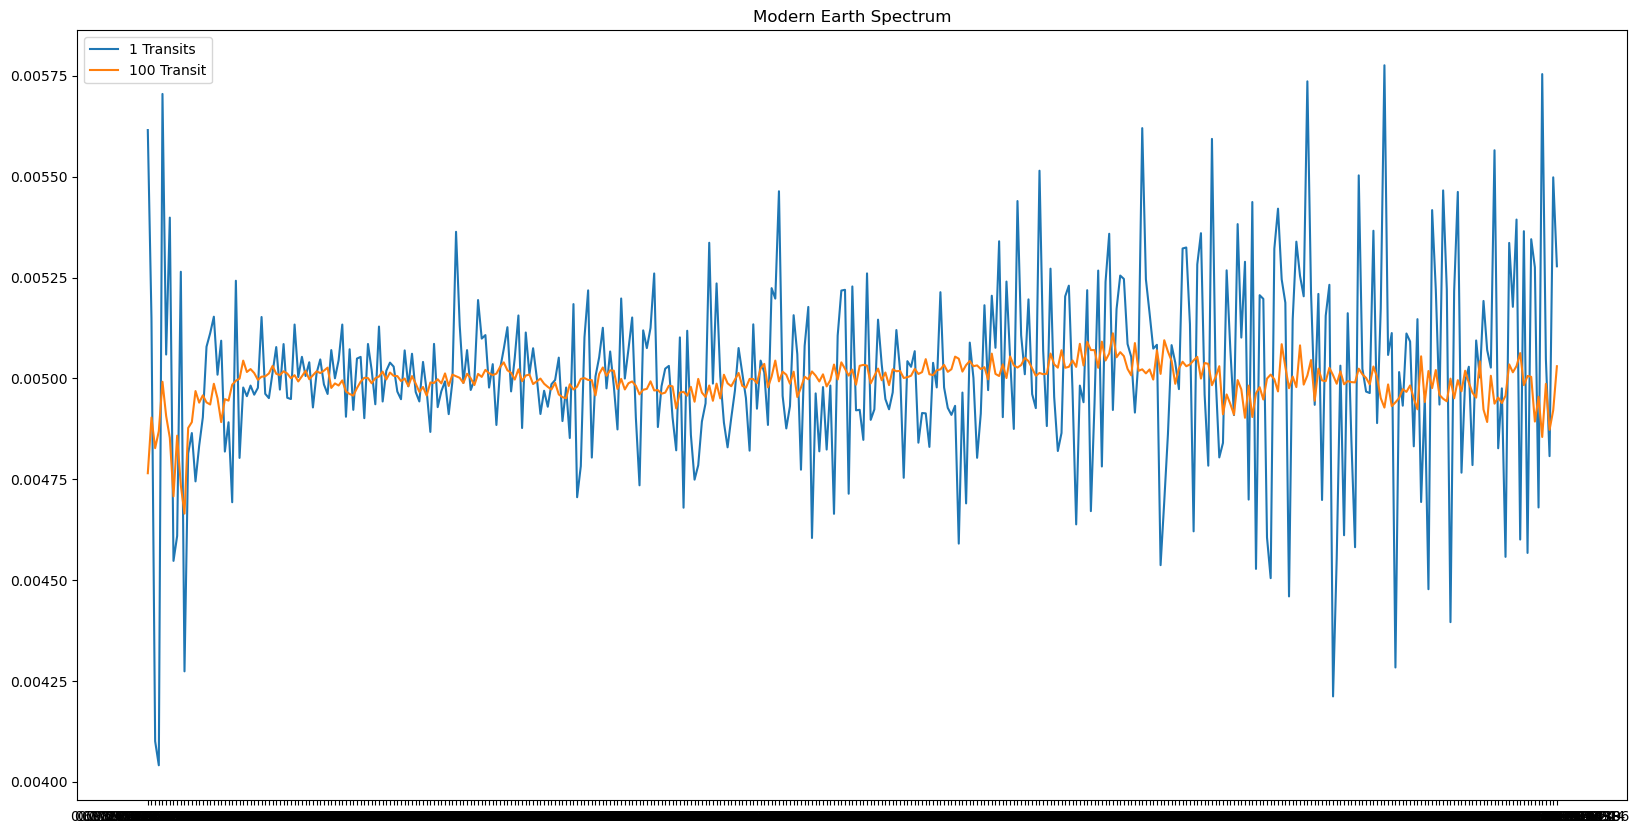

In [9]:
plt.figure(figsize=(20, 10)) 
plt.plot(pd.read_csv("spec_earth/E_0.0Ga_fspot0.01_ffac0.08_1transits.csv").iloc[0], label="1 Transits")
plt.plot(pd.read_csv("spec_earth/E_0.0Ga_fspot0.01_ffac0.08_100transits.csv").iloc[0], label="100 Transit")
plt.title("Modern Earth Spectrum")
plt.legend()


# Test



32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
32/32 ━━━━━━━━━━━━━━━━━━━

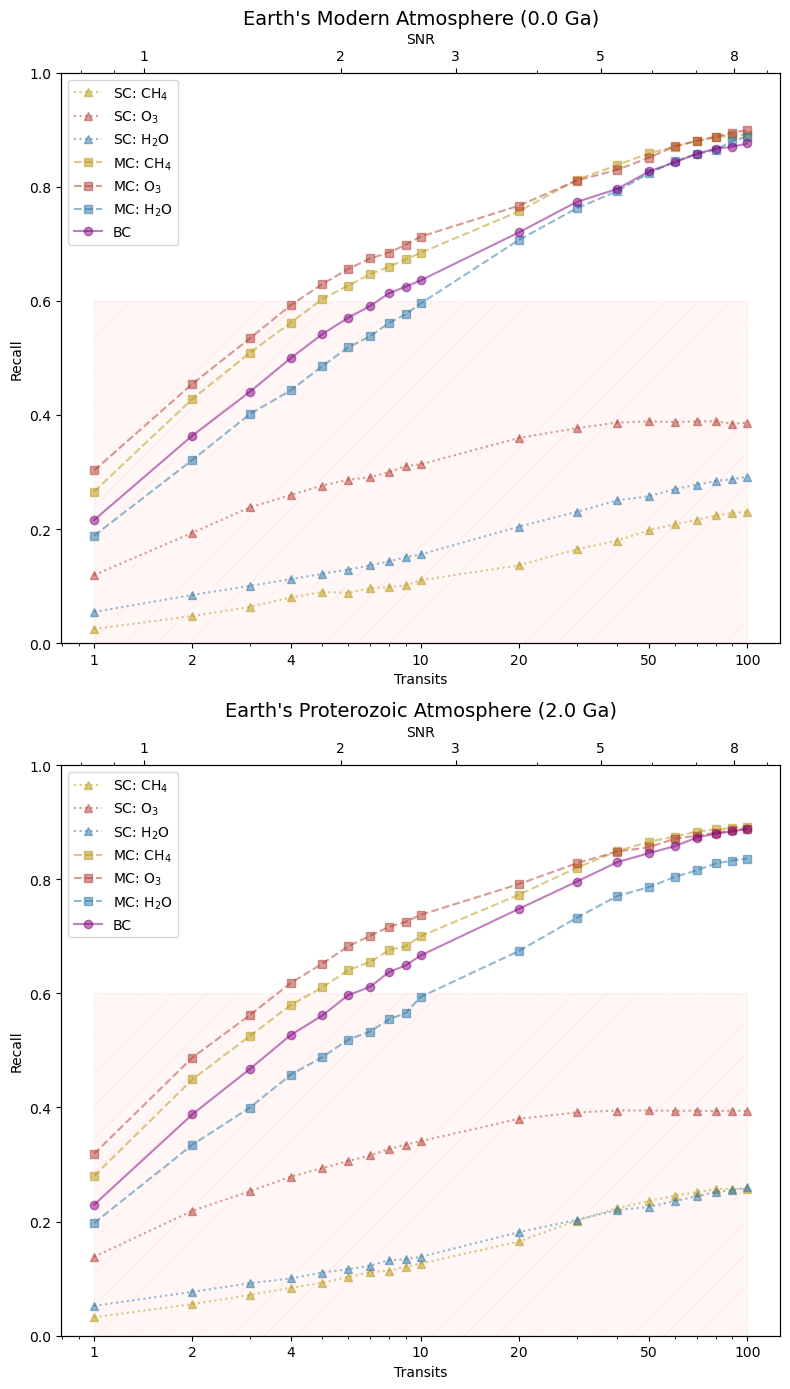

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score

###############################################################################
# 1) Parámetros generales
###############################################################################
contamination_params = [
    (0.00, 0.00),  # base
    (0.01, 0.08), (0.01, 0.54), (0.01, 0.70),
    (0.08, 0.08), (0.08, 0.54), (0.08, 0.70),
    (0.26, 0.08), (0.26, 0.54), (0.26, 0.70)
]

n_transits = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]

# Escala JWST dada (índices 0..99 para transits=1..100)
JWST = [
    0.83862624, 1.1859966 , 1.45254326, 1.67725248, 1.87522528,
    2.05420638, 2.21879648, 2.37199321, 2.51587872, 2.65196903,
    2.78140858, 2.90508652, 3.02370991, 3.13785207, 3.24798547,
    3.35450497, 3.45774457, 3.55798981, 3.65548704, 3.75045057,
    3.84306823, 3.93350574, 4.02191017, 4.10841275, 4.19313121,
    4.27617157, 4.35762978, 4.43759296, 4.51614052, 4.5933451 ,
    4.6692733 , 4.74398642, 4.81754098, 4.88998927, 4.96137975,
    5.03175745, 5.10116428, 5.16963935, 5.2372192 , 5.30393806,
    5.36982801, 5.43491921, 5.49924002, 5.56281717, 5.62567585,
    5.6878399 , 5.74933185, 5.81017304, 5.87038369, 5.92998302,
    5.98898928, 6.04741983, 6.10529119, 6.16261913, 6.21941866,
    6.27570414, 6.33148928, 6.38678718, 6.44161039, 6.49597093,
    6.54988033, 6.60334963, 6.65638943, 6.70900993, 6.76122091,
    6.81303179, 6.86445163, 6.91548915, 6.96615275, 7.01645054,
    7.06639032, 7.11597963, 7.16522575, 7.21413571, 7.26271629,
    7.31097408, 7.3589154 , 7.40654642, 7.45387308, 7.50090114,
    7.54763617, 7.5940836 , 7.64024867, 7.68613646, 7.73175192,
    7.77709982, 7.82218484, 7.86701148, 7.91158414, 7.95590709,
    7.99998447, 8.04382033, 8.08741859, 8.13078308, 8.17391751,
    8.21682551, 8.2595106 , 8.30197623, 8.34422575, 8.38626242
]

# Colores
mol_colors_normal = {"CH4":"#B7950B", "O3":"#B03A2E", "H2O":"#2874A6"}
mol_colors_bc     = {"CH4":"purple"}

###############################################################################
# 2) Diccionarios de resultados (SC, MC, BC) para atmósfera 0.0Ga y 2.0Ga
###############################################################################
results_modern_SC = {"CH4":{}, "O3":{}, "H2O":{}}
results_modern_1F = {"CH4":{}, "O3":{}, "H2O":{}}
results_modern_BC = {"CH4":{}}

results_2ga_SC = {"CH4":{}, "O3":{}, "H2O":{}}
results_2ga_1F = {"CH4":{}, "O3":{}, "H2O":{}}
results_2ga_BC = {"CH4":{}}

def init_dicts(sc_dict, mc_dict, bc_dict):
    for c in contamination_params:
        sc_dict["CH4"][c] = []
        sc_dict["O3"][c]  = []
        sc_dict["H2O"][c] = []
        mc_dict["CH4"][c] = []
        mc_dict["O3"][c]  = []
        mc_dict["H2O"][c] = []
        bc_dict["CH4"][c] = []

init_dicts(results_modern_SC, results_modern_1F, results_modern_BC)
init_dicts(results_2ga_SC,    results_2ga_1F,    results_2ga_BC)

###############################################################################
# 3) Función para leer CSVs y llenar los diccionarios
###############################################################################
def fill_results_for_atmosphere(age, sc_dict, mc_dict, bc_dict):
    for n in n_transits:
        for (f_spot, f_fac) in contamination_params:
            # Ajusta la ruta según tu organización
            file_name = f"spec_earth/E_{age}Ga_fspot{f_spot:.2f}_ffac{f_fac:.2f}_{n}transits.csv"
            df = pd.read_csv(file_name)

            # Etiqueta = [1,1,1]
            df["label"] = df.apply(lambda row: [1,1,1], axis=1)
            cols = list(df.columns)
            cols = [cols[-1]] + cols[:-1]
            df = df[cols]

            # Normalizar + encoder
            df.iloc[:,1:] = normalize_min_max_by_row(df.iloc[:,1:])
            X = df.iloc[:,1:].values
            X_enc = encoder.predict(X)

            X_sc_enc_CH4 = CH4_encoder.predict(X)
            X_sc_enc_O3 = O3_encoder.predict(X)
            X_sc_enc_H2O = H2O_encoder.predict(X)

            
            # Etiquetas reales
            df["CH4 label"] = df["label"].apply(lambda x: x[0])
            df["O3 label"]  = df["label"].apply(lambda x: x[1])
            df["H2O label"] = df["label"].apply(lambda x: x[2])

            # ---------------------------------------------

            th_CH4_sc = 0.33
            th_O3_sc = 0.27
            th_H2O_sc = 0.43
            
            # ===== SC =====
            #pCH4_sc = rf_CH4.predict_proba(X_enc)[:,1]
            #pO3_sc  = rf_O3.predict_proba(X_enc)[:,1]
            #pH2O_sc = rf_H2O.predict_proba(X_enc)[:,1]

            pCH4_sc = rf_CH4.predict_proba(X_sc_enc_CH4)[:,1]
            pO3_sc  = rf_O3.predict_proba(X_sc_enc_O3)[:,1]
            pH2O_sc = rf_H2O.predict_proba(X_sc_enc_H2O)[:,1]

            #df["CH4 SC pred"] = (pCH4_sc>0.32).astype(int)
            df["CH4 SC pred"] = (pCH4_sc>th_CH4_sc).astype(int)
            #df["O3 SC pred"]  = (pO3_sc>0.24).astype(int)
            df["O3 SC pred"]  = (pO3_sc>th_O3_sc).astype(int)
            #df["H2O SC pred"] = (pH2O_sc>0.37).astype(int)
            df["H2O SC pred"] = (pH2O_sc>th_H2O_sc).astype(int)

            r_ch4_sc = recall_score(df["CH4 label"], df["CH4 SC pred"])
            r_o3_sc  = recall_score(df["O3 label"],  df["O3 SC pred"])
            r_h2o_sc = recall_score(df["H2O label"], df["H2O SC pred"])
            sc_dict["CH4"][(f_spot,f_fac)].append(r_ch4_sc)
            sc_dict["O3"][(f_spot,f_fac)].append(r_o3_sc)
            sc_dict["H2O"][(f_spot,f_fac)].append(r_h2o_sc)

            # MC
            pCH4_mc = rf.predict_proba(X_enc)[0][:,1]
            pO3_mc  = rf.predict_proba(X_enc)[1][:,1]
            pH2O_mc = rf.predict_proba(X_enc)[2][:,1]
            df["CH4 MC pred"] = (pCH4_mc>0.28).astype(int)
            df["O3 MC pred"]  = (pO3_mc>0.24).astype(int)
            df["H2O MC pred"] = (pH2O_mc>0.36).astype(int)
            r_ch4_mc = recall_score(df["CH4 label"], df["CH4 MC pred"])
            r_o3_mc  = recall_score(df["O3 label"],  df["O3 MC pred"])
            r_h2o_mc = recall_score(df["H2O label"], df["H2O MC pred"])
            mc_dict["CH4"][(f_spot,f_fac)].append(r_ch4_mc)
            mc_dict["O3"][(f_spot,f_fac)].append(r_o3_mc)
            mc_dict["H2O"][(f_spot,f_fac)].append(r_h2o_mc)

            # BC
            pBC = rf_inter.predict_proba(X_enc)[:,1]
            df["CH4 INTER pred"] = (pBC>0.45).astype(int)
            r_ch4_bc = recall_score(df["CH4 label"], df["CH4 INTER pred"])
            bc_dict["CH4"][(f_spot,f_fac)].append(r_ch4_bc)

# 4) Llenar para atmósferas 0.0Ga y 2.0Ga
fill_results_for_atmosphere(0.0, results_modern_SC, results_modern_1F, results_modern_BC)
fill_results_for_atmosphere(2.0, results_2ga_SC,    results_2ga_1F,    results_2ga_BC)

###############################################################################
# 5) Función de ayuda para calcular el promedio de un dict de { (f_spot,f_fac) : [..] }
###############################################################################
def compute_mean_recall(mol_dict):
    """
    mol_dict => { (f_spot,f_fac): [recall_n1, recall_n2, ...], ... }
    Retorna un array shape=(len(n_transits),) con el promedio
    a lo largo de TODAS las contaminaciones (f_spot, f_fac).
    """
    all_contams = np.array(list(mol_dict.values()))  # shape=(#contam, len(n_transits))
    return all_contams.mean(axis=0)  # shape=(len(n_transits),)

###############################################################################
# 6) Calculamos los promedios de SC, MC, BC (CH4/O3/H2O o CH4) para 0.0Ga y 2.0Ga
###############################################################################
# -- Para 0.0Ga --
sc_ch4_mod = compute_mean_recall(results_modern_SC["CH4"])
sc_o3_mod  = compute_mean_recall(results_modern_SC["O3"])
sc_h2o_mod = compute_mean_recall(results_modern_SC["H2O"])

mc_ch4_mod = compute_mean_recall(results_modern_1F["CH4"])
mc_o3_mod  = compute_mean_recall(results_modern_1F["O3"])
mc_h2o_mod = compute_mean_recall(results_modern_1F["H2O"])

bc_ch4_mod = compute_mean_recall(results_modern_BC["CH4"])

# -- Para 2.0Ga --
sc_ch4_2ga = compute_mean_recall(results_2ga_SC["CH4"])
sc_o3_2ga  = compute_mean_recall(results_2ga_SC["O3"])
sc_h2o_2ga = compute_mean_recall(results_2ga_SC["H2O"])

mc_ch4_2ga = compute_mean_recall(results_2ga_1F["CH4"])
mc_o3_2ga  = compute_mean_recall(results_2ga_1F["O3"])
mc_h2o_2ga = compute_mean_recall(results_2ga_1F["H2O"])

bc_ch4_2ga = compute_mean_recall(results_2ga_BC["CH4"])

###############################################################################
# 7) Función para graficar un "panel" con SC, MC, BC promediados
###############################################################################
def plot_mean_recall_panel(ax, n_transits, sc_ch4, sc_o3, sc_h2o,
                           mc_ch4, mc_o3, mc_h2o,
                           bc_ch4,
                           title=""):
    """
    Dibuja en 'ax' las líneas promediadas de SC (CH4,O3,H2O),
    MC (CH4,O3,H2O), BC (CH4).
    """
    # Fill 0..0.6
    ax.fill_between(n_transits, 0, 0.6,
                    hatch="/", color="red",
                    alpha=0.035)

    # SC => 3 moléculas, estilo: "--", marker="^"
    ax.plot(n_transits, sc_ch4, label="SC: CH$_4$",
            color="#B7950B", linestyle=":", marker="^", alpha=0.5)
    ax.plot(n_transits, sc_o3,  label="SC: O$_3$",
            color="#B03A2E", linestyle=":", marker="^", alpha=0.5)
    ax.plot(n_transits, sc_h2o, label="SC: H$_2$O",
            color="#2874A6", linestyle=":", marker="^", alpha=0.5)

    # MC => 3 moléculas, estilo: ":", marker="s"
    ax.plot(n_transits, mc_ch4, label="MC: CH$_4$",
            color="#B7950B", linestyle="--", marker="s", alpha=0.5)
    ax.plot(n_transits, mc_o3,  label="MC: O$_3$",
            color="#B03A2E", linestyle="--", marker="s", alpha=0.5)
    ax.plot(n_transits, mc_h2o, label="MC: H$_2$O",
            color="#2874A6", linestyle="--", marker="s", alpha=0.5)

    # BC => sólo CH4 => color purple
    ax.plot(n_transits, bc_ch4, label="BC",
            color="purple", linestyle="-", marker="o", alpha=0.5)

    # Ajustes
    ax.set_title(title, fontsize=14)
    ax.set_xscale("log")
    ax.set_xticks([1,2,4,10,20,50,100])
    ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
    ax.set_xlabel("Transits")
    ax.set_ylabel("Recall")
    ax.set_ylim(0,1)
    ax.legend()

###############################################################################
# 8) Generamos la figura con 2 subplots (en 1 fila) => [0] Modern (0.0Ga), [1] Proterozoic (2.0Ga)
#    Cada subplot tendrá un eje X secundario (twiny) para JWST
###############################################################################
fig, (ax_mod, ax_proto) = plt.subplots(2, 1, figsize=(8,14), sharey=True)

# ------------------------------------------------------------------
# Subplot (0): Earth’s Modern Atmosphere
# ------------------------------------------------------------------
plot_mean_recall_panel(ax_mod, n_transits,
                       sc_ch4_mod, sc_o3_mod, sc_h2o_mod,
                       mc_ch4_mod, mc_o3_mod, mc_h2o_mod,
                       bc_ch4_mod,
                       title="Earth's Modern Atmosphere (0.0 Ga)")

ax_mod_twiny = ax_mod.twiny()
# Convertimos n_transits en jwst_points => JWST[n-1] (n desde 1..100)
jwst_points_mod = [JWST[n-1] for n in n_transits]
ax_mod_twiny.plot(jwst_points_mod, sc_ch4_mod, alpha=0)  # forzamos la escala
ax_mod_twiny.set_xlabel("SNR")
ax_mod_twiny.set_xscale("log")
ax_mod_twiny.set_xticks([1,2,3,5,8])
ax_mod_twiny.get_xaxis().set_major_formatter(plt.ScalarFormatter())

# ------------------------------------------------------------------
# Subplot (1): Earth’s Proterozoic Atmosphere
# ------------------------------------------------------------------
plot_mean_recall_panel(ax_proto, n_transits,
                       sc_ch4_2ga, sc_o3_2ga, sc_h2o_2ga,
                       mc_ch4_2ga, mc_o3_2ga, mc_h2o_2ga,
                       bc_ch4_2ga,
                       title="Earth's Proterozoic Atmosphere (2.0 Ga)")

ax_proto_twiny = ax_proto.twiny()
jwst_points_proto = [JWST[n-1] for n in n_transits]
ax_proto_twiny.plot(jwst_points_proto, sc_ch4_2ga, alpha=0)
ax_proto_twiny.set_xlabel("SNR")
ax_proto_twiny.set_xscale("log")
ax_proto_twiny.set_xticks([1,2,3,5,8])
ax_proto_twiny.get_xaxis().set_major_formatter(plt.ScalarFormatter())

# Ajustes finales
plt.tight_layout()

#plt.savefig("fotos/auto-final-contam.png", dpi=300)
plt.show()
